https://developer.spotify.com/
Con el usuario de spotify, se deben aceptar los terminos y condiciones.
En https://developer.spotify.com/dashboard/applications crear una aplicación.

https://medium.com/@samlupton/spotipy-get-features-from-your-favourite-songs-in-python-6d71f0172df0

VER https://rareloot.medium.com/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330
https://betterprogramming.pub/how-to-extract-any-artists-data-using-spotify-s-api-python-and-spotipy-4c079401bc37

In [5]:
import re

In [6]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=Warning)
# Seteos de Pandas para ver mejor la info. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
# In max_columns and max_rows ‘None’ value means unlimited.
pd.set_option('display.max_rows', 100)
# Conviene setear min_rows también porque cuando se superan las max_rows, sólo muestra la cantidad indicada en min_rows.
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100
pd.options.display.float_format = '{:.1f}'.format

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [8]:
import json

In [9]:
import os
# These environment variables should be set:
os.environ["SPOTIPY_CLIENT_ID"] = "561eaaa8d6e7425e82ce1058c901d256"
print(os.environ.get('SPOTIPY_CLIENT_ID'))
os.environ["SPOTIPY_CLIENT_SECRET"] = "b283b99b470f43429409389670355747"
os.environ["SPOTIPY_REDIRECT_URI"] = "http://google.com/"
#print(os.environ['SPOTIPY_CLIENT_ID'])

561eaaa8d6e7425e82ce1058c901d256


In [10]:
# To work with a user data, you should get a token, especifying the authorization scope:
# https://developer.spotify.com/documentation/general/guides/authorization/scopes/#user-top-read
# user-top-read, user-read-recently-played
# user-library-read: Check User's Saved Tracks
scope = 'user-top-read user-read-recently-played user-library-read'
user = 'colmo-ar'

In [7]:
token = SpotifyOAuth(scope=scope, username=user)

Otra manera de hacerlo<br>

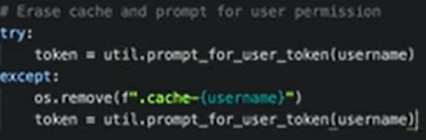

In [8]:
# Create Spotify Object:
sp = spotipy.Spotify(auth_manager = token)

In [53]:
############## Get the User Playlists ###################
#search(q, limit=10, offset=0, type='track', market=None)
# track(track_id, market=None) returns a single track given the track’s ID, URI or URL
# tracks(tracks, market=None) returns a list of tracks given a list of track IDs, URIs, or URLs
# user_playlists(user, limit=50, offset=0) Gets playlists of a user
#playlists = sp.current_user_playlists(limit=50, offset=0)
# audio_analysis(track_id) ################## NO SE ENTIENDE Y ES SUPER LARGO
# audio_features(tracks=[])
#playlists = sp.user_playlists(user=user, offset=0) #limit=50,
results = sp.user_playlists(user=user, offset=0)
playlists = results['items']
while results['next']:
    results = sp.next(results)
    playlists.extend(results['items'])

In [233]:
# The playlist are in a list: playlists['items']
# Important playlist's attributes: id, uri, name, public, tracks['total']
print('************ Playlists *************')
idx=0
rows=[]
for playlist in playlists:
    idx+=1
    print(idx, playlist['name'], 'Track Qty:', playlist['tracks']['total'], 'Id:', playlist['id']
          , 'owner:', playlist['owner']['display_name'])
    row=[playlist['name'], playlist['tracks']['total'], playlist['id'], playlist['owner']['display_name']]

************ Playlists *************
1 2022.05 Disco Track Qty: 38 Id: 4tMZamkzAlFJOcvyQ2egml owner: Carla Olmo
2 Fiesta 6B - Trap y Latino Track Qty: 10 Id: 3kisqni1uxckfARswp836Q owner: Carla Olmo
3 Fiesta 6B - Fiesta Track Qty: 8 Id: 39DsW6dzoGaVCo5nX9pSX2 owner: Carla Olmo
4 Fiesta 6B - Baile Track Qty: 37 Id: 5BF4Od7vZFcdZodsHQDEDS owner: Carla Olmo
5 Fiesta 6B - Tranqui Track Qty: 13 Id: 0nxeJfVKpQKFIqCBSZ5whW owner: Carla Olmo
6 Oíd Mortales - Verano 2000 Track Qty: 9 Id: 3iyOp2p6HOArmeXaJXa4jK owner: Carla Olmo
7 Guto Loudeiro 80’ Remixes Track Qty: 19 Id: 3mipmlf0S06gLIa1LIs49t owner: Carla Olmo
8 2020-12 Track Qty: 58 Id: 382z06VvrTYuALuVXuJqni owner: Carla Olmo
9 2020-08 Track Qty: 23 Id: 0DVRCLRBJzT6qBFfaN7YNW owner: Carla Olmo
10 Rock Argentino para Mover el Q Track Qty: 44 Id: 3EBBwi4i6VldBpJ1RSRpqm owner: Carla Olmo
11 2020-04 Track Qty: 22 Id: 3paDtPYAxRjNknDJmZxFPb owner: Carla Olmo
12 80 Epic Pop Track Qty: 8 Id: 4uMjrPZIYKTwg5bKo9XW2e owner: Carla Olmo
13 00 Girls Tr

In [238]:
print(json.dumps(playlist_tracks[0]['track']['album']['images'][0]['url'], sort_keys=True, indent=4))

"https://i.scdn.co/image/ab67616d0000b273b30c8b93cef6fa26f8a7f17a"


In [76]:
# acousticness: from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
# danceability: how suitable a track is for dancing based on a combination of musical elements including tempo, 
# rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
# energy: from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
# Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, 
# while a Bach prelude scores low on the scale. 
# instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental 
# Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
# key: E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
# liveness: Detects the presence of an audience in the recording. Above 0.8 provides strong likelihood the track is live.
# loudness: The overall loudness of a track in decibels (dB).
# mode: modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
# Major is represented by 1 and minor is 0.
# speechiness: Speechiness detects the presence of spoken words in a track. 
# Values between 0.33 and 0.66 describe tracks that may contain both music and speech
# time_signature: notational convention to specify how many beats are in each bar (or measure). 
# The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
features = sp.audio_features(track['id'])
#print(json.dumps(features[0], sort_keys=True, indent=4))
def get_feature_lst(features):
    feat = [features['acousticness'], features['danceability'], features['energy'], features['instrumentalness']
           , features['liveness'], features['loudness'], round(features['tempo'])]
    key = ['C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F♯/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B']
    feat.extend(['No Key' if features['key']==-1 else key[features['key']]])
    return feat
feat_ = get_feature_lst(features[0])
feat_

[0.0428, 0.717, 0.602, 0, 0.0752, -9.125, 128, 'G']

In [264]:
for playlist_track in playlist_tracks:
    track = playlist_track['track']
    print(json.dumps(playlist_track['added_at'], sort_keys=True, indent=4))
    if len(track['album']['images'])==0:
        print(track['name'])

"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13T15:53:53Z"
"2022-05-13

# Build a Dataframe

In [248]:
# Let's build a dataframe!
idx=0
rows=[]
for playlist in playlists:
    idx+=1
    if True: #idx <3:
        print(idx, playlist['name'], 'Track Qty:', playlist['tracks']['total'], 'Id:', playlist['id']
              , 'owner:', playlist['owner']['display_name'])
        playlist_data=[playlist['id'], playlist['name'], playlist['tracks']['total'], playlist['owner']['display_name']]
        results = sp.user_playlist_tracks(user=user, playlist_id=playlist['id']
                                    , fields=None, limit=100, offset=0, market=None)
        playlist_tracks = results['items']
        while results['next']:
            results = sp.next(results)
            playlist_tracks.extend(results['items'])
        jdx=0
        for playlist_track in playlist_tracks:
            jdx+=1
            if True: #jdx < 3:
                track = playlist_track['track']
                track_features = sp.audio_features(track['id'])
                row = []
                row.extend(playlist_data)
                row.extend([track['id'], track['name'], round(int(track['duration_ms'])/1000/60, 2), track['popularity']
                    , track['artists'][0]['name'], track['album']['name'], track['album']["release_date"]
                    , '' if len(track['album']['images'])==0 else track['album']['images'][0]['url']
                    , playlist_track['added_at']])
                row.extend(get_feature_lst(track_features[0]))
                rows.append(row)
df_playlists = pd.DataFrame(data=rows, columns=['playlist_id', 'playlist_name', 'track_qty', 'owner'
                                                , 'track_id', 'track_name'
                                                , 'duration', 'popularity', 'artist', 'album', 'album_release_date'
                                                , 'album_image', 'added_at', 'acousticness', 'danceability', 'energy'
                                                , 'instrumentalness', 'liveness', 'loudness', 'tempo', 'key'])

1 2022.05 Disco Track Qty: 38 Id: 4tMZamkzAlFJOcvyQ2egml owner: Carla Olmo
2 Fiesta 6B - Trap y Latino Track Qty: 10 Id: 3kisqni1uxckfARswp836Q owner: Carla Olmo
3 Fiesta 6B - Fiesta Track Qty: 8 Id: 39DsW6dzoGaVCo5nX9pSX2 owner: Carla Olmo
4 Fiesta 6B - Baile Track Qty: 37 Id: 5BF4Od7vZFcdZodsHQDEDS owner: Carla Olmo
5 Fiesta 6B - Tranqui Track Qty: 13 Id: 0nxeJfVKpQKFIqCBSZ5whW owner: Carla Olmo
6 Oíd Mortales - Verano 2000 Track Qty: 9 Id: 3iyOp2p6HOArmeXaJXa4jK owner: Carla Olmo
7 Guto Loudeiro 80’ Remixes Track Qty: 19 Id: 3mipmlf0S06gLIa1LIs49t owner: Carla Olmo
8 2020-12 Track Qty: 58 Id: 382z06VvrTYuALuVXuJqni owner: Carla Olmo
9 2020-08 Track Qty: 23 Id: 0DVRCLRBJzT6qBFfaN7YNW owner: Carla Olmo
10 Rock Argentino para Mover el Q Track Qty: 44 Id: 3EBBwi4i6VldBpJ1RSRpqm owner: Carla Olmo
11 2020-04 Track Qty: 22 Id: 3paDtPYAxRjNknDJmZxFPb owner: Carla Olmo
12 80 Epic Pop Track Qty: 8 Id: 4uMjrPZIYKTwg5bKo9XW2e owner: Carla Olmo
13 00 Girls Track Qty: 14 Id: 6nJTQmQbD2kbg5kLhKdHz

In [249]:
df_playlists.head()

,playlist_id,playlist_name,track_qty,owner,track_id,track_name,duration,popularity,artist,album,album_release_date,album_image,added_at,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,key
0,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1ot6jEe4w4hYnsOPjd3xKQ,I'm So Excited,3.8,69,The Pointer Sisters,So Excited! (Expanded Edition),1982-02-01,https://i.scdn.co/image/ab67616d0000b2734650ca0a8f88129d4667acc5,2022-05-06T23:09:31Z,0.1,0.6,0.9,0.0,0.4,-5.8,184,F
1,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1qEHgdFqUxFebMPk8s2HLY,I Don't Feel Like Dancin' - Radio Edit,4.1,62,Scissor Sisters,I Don't Feel Like Dancin',2006-01-01,https://i.scdn.co/image/ab67616d0000b273d0a50cacfb47854fa416cd6c,2022-05-06T23:12:33Z,0.0,0.7,0.9,0.0,0.1,-3.4,108,G
2,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3SnGymj6ijE2iuUfWxLo1q,I'm Coming Out,5.4,68,Diana Ross,Diana,1980-05-22,https://i.scdn.co/image/ab67616d0000b273abc5193decc1a2984a93f31e,2022-05-06T23:11:25Z,0.2,0.7,0.8,0.4,0.1,-9.2,110,F
3,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3koCCeSaVUyrRo3N2gHrd8,Let's Groove,5.7,77,"Earth, Wind & Fire",Raise!,1981-11-14,https://i.scdn.co/image/ab67616d0000b273b30c8b93cef6fa26f8a7f17a,2022-05-06T23:13:20Z,0.1,0.9,0.6,0.0,0.1,-8.7,125,B
4,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,7s3FSodLpnKMzeMj17G5d0,That's the Way (I Like It),5.1,48,KC & The Sunshine Band,The TK Years,2009-03-09,https://i.scdn.co/image/ab67616d0000b273ceed1ca675cd1821644a3bf4,2022-05-06T23:14:11Z,0.1,0.7,0.9,0.0,0.3,-6.9,109,F


### To .csv

In [250]:
df_playlists.to_csv('colmo-ar.csv')

In [17]:
df_playlists = pd.read_csv('colmo-ar.csv')

# Bilboard
https://github.com/guoguo12/billboard-charts

# EDA

In [18]:
df_pl = df_playlists.copy()

In [19]:
print(df_pl.shape)
df_pl.dtypes

(3081, 22)


Unnamed: 0              int64
playlist_id            object
playlist_name          object
track_qty               int64
owner                  object
track_id               object
track_name             object
duration              float64
popularity              int64
artist                 object
album                  object
album_release_date     object
album_image            object
added_at               object
acousticness          float64
danceability          float64
energy                float64
instrumentalness      float64
liveness              float64
loudness              float64
tempo                   int64
key                    object
dtype: object

In [20]:
# There is a row with error, I drop it:
df_pl.album_release_date.min()
df_pl[df_pl.album_release_date=='0000'] #--> index=2031
df_pl.drop([2031], inplace=True)

In [21]:
df_pl.drop(columns=['Unnamed: 0'], inplace=True)
# Now you can change the type of release_date to timestamp:
df_pl.album_release_date = df_pl.album_release_date.astype(str)
df_pl.album_release_date = pd.to_datetime(df_pl.album_release_date, format='%Y-%m-%d %H:%M:%S')
df_pl.added_at = df_pl.added_at.astype(str)
df_pl.added_at = pd.to_datetime(df_pl.added_at, format='%Y-%m-%dT%H:%M:%SZ')
df_pl.dtypes

playlist_id                   object
playlist_name                 object
track_qty                      int64
owner                         object
track_id                      object
track_name                    object
duration                     float64
popularity                     int64
artist                        object
album                         object
album_release_date    datetime64[ns]
album_image                   object
added_at              datetime64[ns]
acousticness                 float64
danceability                 float64
energy                       float64
instrumentalness             float64
liveness                     float64
loudness                     float64
tempo                          int64
key                           object
dtype: object

In [22]:
# Add playlist created date:
df_gb = df_pl.groupby(['playlist_id'], as_index=False).agg(added_at=('added_at', 'min'))
df_pl = df_pl.merge(right=df_gb, how='inner', on='playlist_id')
df_pl.rename(columns={'added_at_y': 'playlist_date'}, inplace=True)
df_pl.head()

,playlist_id,playlist_name,track_qty,owner,track_id,track_name,duration,popularity,artist,album,album_release_date,album_image,added_at_x,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,key,playlist_date
0,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1ot6jEe4w4hYnsOPjd3xKQ,I'm So Excited,3.8,69,The Pointer Sisters,So Excited! (Expanded Edition),1982-02-01,https://i.scdn.co/image/ab67616d0000b2734650ca0a8f88129d4667acc5,2022-05-06 23:09:31,0.1,0.6,0.9,0.0,0.4,-5.8,184,F,2022-05-06 23:09:31
1,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1qEHgdFqUxFebMPk8s2HLY,I Don't Feel Like Dancin' - Radio Edit,4.1,62,Scissor Sisters,I Don't Feel Like Dancin',2006-01-01,https://i.scdn.co/image/ab67616d0000b273d0a50cacfb47854fa416cd6c,2022-05-06 23:12:33,0.0,0.7,0.9,0.0,0.1,-3.4,108,G,2022-05-06 23:09:31
2,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3SnGymj6ijE2iuUfWxLo1q,I'm Coming Out,5.4,68,Diana Ross,Diana,1980-05-22,https://i.scdn.co/image/ab67616d0000b273abc5193decc1a2984a93f31e,2022-05-06 23:11:25,0.2,0.7,0.8,0.4,0.1,-9.2,110,F,2022-05-06 23:09:31
3,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3koCCeSaVUyrRo3N2gHrd8,Let's Groove,5.7,77,"Earth, Wind & Fire",Raise!,1981-11-14,https://i.scdn.co/image/ab67616d0000b273b30c8b93cef6fa26f8a7f17a,2022-05-06 23:13:20,0.1,0.9,0.6,0.0,0.1,-8.7,125,B,2022-05-06 23:09:31
4,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,7s3FSodLpnKMzeMj17G5d0,That's the Way (I Like It),5.1,48,KC & The Sunshine Band,The TK Years,2009-03-09,https://i.scdn.co/image/ab67616d0000b273ceed1ca675cd1821644a3bf4,2022-05-06 23:14:11,0.1,0.7,0.9,0.0,0.3,-6.9,109,F,2022-05-06 23:09:31


### Songs Released over the years
Which decade do I prefer?

NOTE: drop duplicated tracks

In [24]:
df_hist = df_pl.drop_duplicates(subset=['artist', 'track_name'], keep='last').copy()

In [28]:
df_hist['track_year'] = df_hist.album_release_date.dt.year
df_hist['track_decade'] = df_hist.track_year - (df_hist.track_year%10)

In [25]:
import matplotlib.pyplot as plt

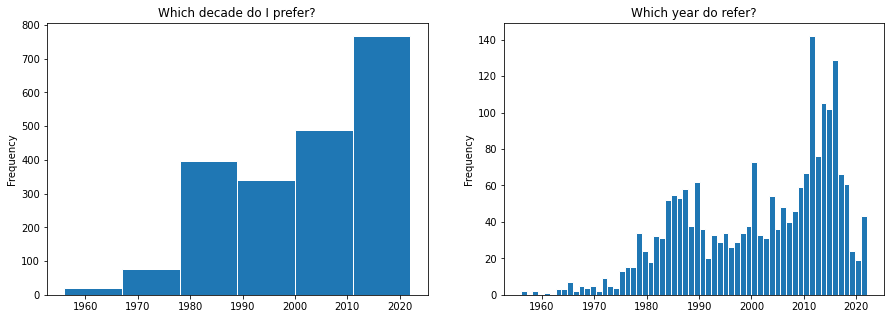

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
df_hist.drop_duplicates(subset=['artist', 'track_name'], keep='last')['track_year'].\
    plot.hist(bins=6, title='Which decade do I prefer?', ax=axes[0], edgecolor='white');
df_hist.drop_duplicates(subset=['artist', 'track_name'], keep='last')['track_year'].\
    plot.hist(bins=60,title='Which year do refer?', ax=axes[1], edgecolor='white');

In [68]:
df_gb = pd.DataFrame(data=df_hist.groupby('track_year').track_name.count())
df_gb.tail()

,track_name
track_year,
2018,61
2019,24
2020,19
2021,39
2022,4


<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue"> Mark Tick Chart</span>

Using Altair<br>
https://altair-viz.github.io/case_studies/exploring-weather.html <br>
Interactive!!!

Colores CSS: https://htmlcolorcodes.com/es/nombres-de-los-colores/

<span style="font-family:Arial Black; font-size:200%;color:CornflowerBlue">Track Year Release Distribution</span>

Trebuchet MS powderblue DarkSalmon

In [1]:
#pip install altair
# https://altair-viz.github.io/getting_started/installation.html

In [2]:
import altair as alt

In [48]:
#axis=alt.Axis(values=np.array(range(1956, 2023)), 
alt.Chart(df_hist).mark_tick().encode(
    alt.X('track_year', title='Tick Marks for track distribution over the years', scale=alt.Scale(zero=False))
).properties(
    width=800,
    height=50
).interactive()

alt.Chart(...)

<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Lollipop Charts</span>

_**data-to-viz.com:** <br>
Even if the most common way to represent **one numeric and one categoric**_ variable is probably to use barplots, lollipop can be a very good alternative, especially if you have a high number of entities. It is basically the same thing, but the bar is replaced by a line and a dot at the end. It allows the figure to be less cluttered.

Moreover, it is a good practice to plot a horizontal version, to make the labels more easily readable. Last, sorting your entities gives much more insight to the plot.

https://www.analyticsvidhya.com/blog/2021/06/lollipop-charts-advanced-data-visualization-in-python/<br>
https://www.python-graph-gallery.com/182-vertical-lollipop-plot

<span style="font-family:Arial Black; font-size:200%;color:CornflowerBlue">Top 20 Artists</span>

In [382]:
df_gb = pd.DataFrame(data=df_hist.groupby('artist').track_name.count())
df_gb.reset_index()
df_gb = df_gb.sort_values(by='track_name', ascending=False).reset_index()
df_gb.rename(columns={'track_name':'count'}, inplace=True)
df_gb.head()

,artist,count
0,Soda Stereo,40
1,Bee Gees,27
2,Madonna,26
3,Charly García,22
4,Erasure,18


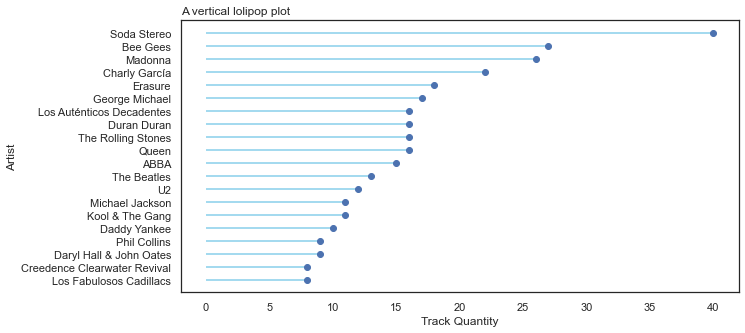

In [384]:
# Reorder it based on the values
df_top_20 = df_gb[df_gb.index<20].sort_values(by='count')
my_range=range(1,len(df_gb[df_gb.index<20].index)+1)

plt.figure(figsize=(10,5))
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=df_top_20['count'], color='skyblue')
plt.plot(df_top_20['count'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, df_top_20['artist'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Track Quantity')
plt.ylabel('Artist')

# Show the plot
plt.show()

<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">WordCloud</span>

<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Most Frecuent Tracks (Top 20 Artists) </span>

In [274]:
from wordcloud import WordCloud, ImageColorGenerator

In [344]:
%matplotlib inline

In [385]:
df_aux = df_hist.copy()
df_aux = df_aux[df_aux.artist.isin(df_top_20.artist.tolist())]
df_aux.track_name = df_aux.apply(lambda x: 
                    x.track_name if '-' not in x.track_name else x.track_name[:x.track_name.find('-')], axis=1)
df_aux.track_name = df_aux.apply(lambda x: 
                    x.track_name if '(feat' not in x.track_name else x.track_name[:x.track_name.find('(feat')], axis=1)
df_aux.track_name = df_aux.apply(lambda x: 
                    x.track_name if '(Original' not in x.track_name else x.track_name[:x.track_name.find('(Original')], axis=1)
#df_aux

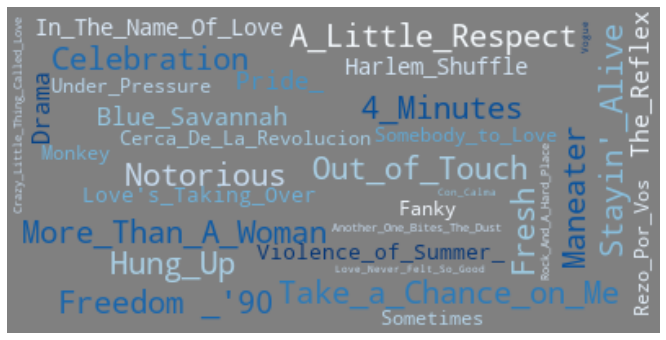

In [390]:
stop_words = ['_feat', 'feat', '_Radio_Edit', '_Original_Mix', '_Remasterizado_2007', '_Remix', '_Remastered'
              , '_Original', 'En_Vivo', '_2', 'Remix', '_']
text = ' '.join(['_'.join(word.split()) for word in df_aux.track_name.to_list()])
word_cloud = WordCloud(stopwords=stop_words, min_font_size=6, max_font_size=20, max_words=80
                       , prefer_horizontal=0.7
                       , background_color="grey"
                       , colormap="Blues").generate(text)
plt.figure(figsize=(15, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [155]:
#https://htmlcolorcodes.com/es/nombres-de-los-colores/

In [173]:
df_pl['playlist_month'] = pd.to_datetime(df_pl.playlist_date.dt.year.astype(str) + '-' +
                                         df_pl.playlist_date.dt.month.astype(str).str.zfill(2) + 
                                         '-01', format='%Y-%m-%d')
df_pl['playlist_m'] = df_pl.playlist_date.dt.month.astype(str).str.zfill(2)
df_pl['playlist_mo'] = df_pl.playlist_date.dt.month
df_pl['playlist_year'] = df_pl.playlist_date.dt.year
df_pl.head(2)

,playlist_id,playlist_name,track_qty,owner,track_id,track_name,duration,popularity,artist,album,album_release_date,album_image,added_at_x,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,key,playlist_date,playlist_year,playlist_month,playlist_m,playlist_mo
0,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1ot6jEe4w4hYnsOPjd3xKQ,I'm So Excited,3.8,69,The Pointer Sisters,So Excited! (Expanded Edition),1982-02-01,https://i.scdn.co/image/ab67616d0000b2734650ca0a8f88129d4667acc5,2022-05-06 23:09:31,0.1,0.6,0.9,0.0,0.4,-5.8,184,F,2022-05-06 23:09:31,2022,2022-05-01,05,5
1,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1qEHgdFqUxFebMPk8s2HLY,I Don't Feel Like Dancin' - Radio Edit,4.1,62,Scissor Sisters,I Don't Feel Like Dancin',2006-01-01,https://i.scdn.co/image/ab67616d0000b273d0a50cacfb47854fa416cd6c,2022-05-06 23:12:33,0.0,0.7,0.9,0.0,0.1,-3.4,108,G,2022-05-06 23:09:31,2022,2022-05-01,05,5


<span style="font-family:Arial Black; font-size:150%;color:LightSteelBlue">Playlist Q by month</span>

In [258]:
df_pls_dist = df_pl.drop_duplicates(subset=['playlist_id']).groupby(['playlist_month', 'playlist_year', 'playlist_mo'
                                        , 'playlist_m']).agg(
                                        count=('playlist_name','count')
                                        , popularity=('popularity', 'mean')
                                        , danceability=('danceability', 'mean')
                                         , energy=('energy', 'mean')
                                         , tempo=('tempo', 'mean'))
df_pls_dist.reset_index(inplace=True)
df_pls_dist.head()

,playlist_month,playlist_year,playlist_mo,playlist_m,count,popularity,danceability,energy,tempo
0,2016-07-01,2016,7,07,3,22.3,0.7,0.8,111.0
1,2016-09-01,2016,9,09,3,46.7,0.5,0.4,131.0
2,2016-10-01,2016,10,10,3,7.0,0.7,0.8,92.0
3,2016-11-01,2016,11,11,12,30.2,0.7,0.8,107.5
4,2016-12-01,2016,12,12,2,26.0,0.5,0.8,140.0


<span style="font-family:Arial Black; font-size:150%;color:LightSteelBlue">Playlist Q by month Density Plots</span>

In [257]:
df_pls = df_pl.groupby(['playlist_name', 'playlist_date', 'playlist_year', 'playlist_month', 'playlist_mo'
                        , 'playlist_m']).agg(count=('playlist_name', 'count')
                                        , popularity=('popularity', 'mean')
                                        , danceability=('danceability', 'mean')
                                         , energy=('energy', 'mean')
                                         , tempo=('tempo', 'mean'))
df_pls.reset_index(inplace=True)
df_pls.head()

,playlist_name,playlist_date,playlist_year,playlist_month,playlist_mo,playlist_m,count,popularity,danceability,energy,tempo
0,00 Girls,2020-04-06 16:55:09,2020,2020-04-01,4,04,14,40.0,0.7,0.8,130.6
1,"12"" Classics",2021-12-22 06:47:11,2021,2021-12-01,12,12,80,20.4,0.7,0.7,120.0
2,12'' Classics CO,2018-09-12 12:20:19,2018,2018-09-01,9,09,38,41.7,0.7,0.7,116.7
3,2020-04,2020-04-13 23:46:17,2020,2020-04-01,4,04,22,48.8,0.7,0.8,126.5
4,2020-08,2020-08-14 23:55:30,2020,2020-08-01,8,08,23,32.4,0.7,0.8,122.7


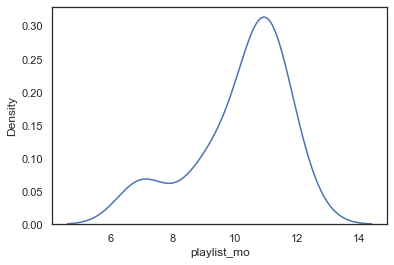

In [261]:
sns.kdeplot(data=df_pls[df_pls.playlist_year==2016], x="playlist_mo");

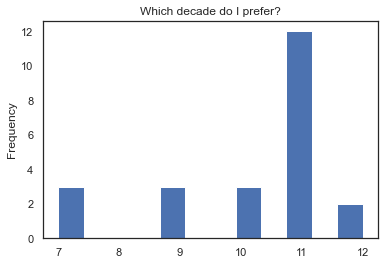

In [201]:
df_pls[df_pls.playlist_year==2016]['playlist_mo'].plot.hist(bins=12, title='Which decade do I prefer?', edgecolor='white');

<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Ridgeline/Joyplot </span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Popularity Distribution of Playlists Over the Years </span><br>
A Ridgeline plot (sometimes called Joyplot) shows the distribution of a numeric value for several groups. Distribution can be represented using histograms or density plots, all aligned to the same horizontal scale and presented with a slight overlap. https://www.data-to-viz.com/graph/ridgeline.html<br>
Source: https://www.python-graph-gallery.com/ridgeline-graph-seaborn

https://seaborn.pydata.org/examples/kde_ridgeplot.html

In [180]:
import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [292]:
# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
year_count_serie = df_pls.drop_duplicates(subset=['playlist_name']).groupby('playlist_year')['playlist_name'].count()
df_pls['year_count'] = df_pls['playlist_year'].map(year_count_serie)
df_pls.head(2)

,playlist_name,playlist_date,playlist_year,playlist_month,playlist_mo,playlist_m,count,popularity,danceability,energy,tempo,year_mean,year_count
0,00 Girls,2020-04-06 16:55:09,2020,2020-04-01,4,04,14,40.0,0.7,0.8,130.6,7,7
1,"12"" Classics",2021-12-22 06:47:11,2021,2021-12-01,12,12,80,20.4,0.7,0.7,120.0,8,8


In [289]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=7)

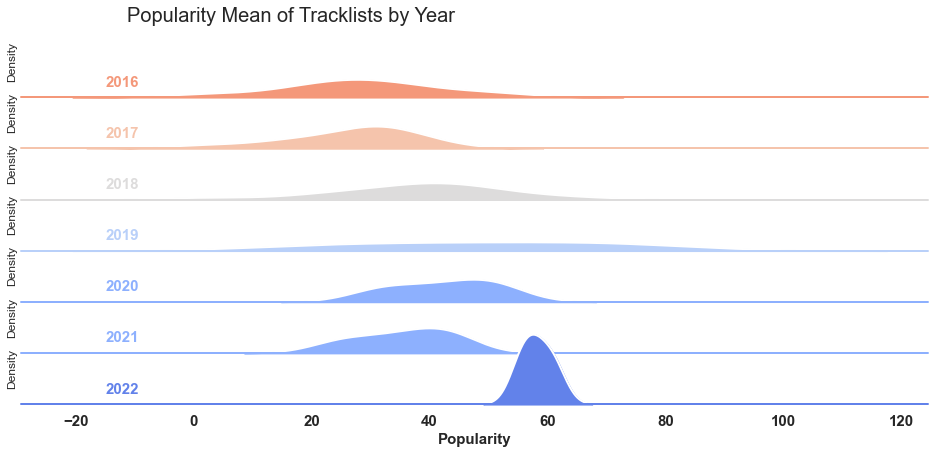

In [293]:
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that 
#will be represented by colors with 'palette'
ordered_years = df_pls.playlist_year.value_counts().index
g = sns.FacetGrid(df_pls, row='playlist_year', row_order=ordered_years, hue='year_count'
                  , aspect=15, height=0.9, palette=pal)#, xlim=(0, 12))
# then we add the densities kdeplots for each month
#g.map(sns.kdeplot, x='popularity',
g.map(sns.kdeplot, "popularity",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5);
#here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'popularity', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2);
# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False);
# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
years = df_pls.playlist_year.unique().tolist()
years.sort()
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, years[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color());
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Popularity', fontweight='bold', fontsize=15)
g.fig.suptitle('Popularity Mean of Tracklists by Year',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Distribution of Playlists per month (Q) Over the Years </span><br>

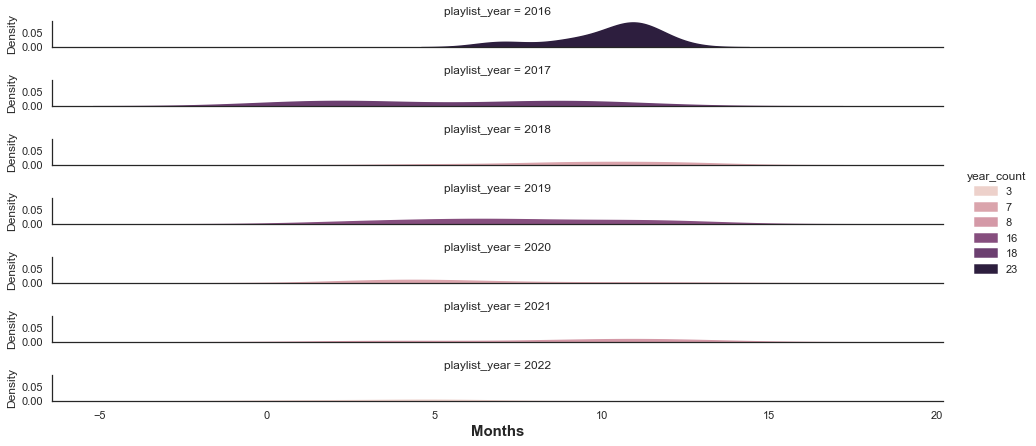

In [315]:
g = sns.displot(data=df_pls, x="playlist_mo", hue="year_count", row="playlist_year", kind="kde", aspect=15, height=0.9
            , fill=True, alpha=1, linewidth=1.5);
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
#g.fig.subplots_adjust(hspace=-0.3)

#g.set_titles("")
#g.set(yticks=[])
#g.despine(bottom=True, left=True);

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Months', fontweight='bold', fontsize=15)
plt.show()

<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Interactive Treemap</span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Popularity by Track and Artist</span><br>
A Treemap displays hierarchical data as a set of nested rectangles. Each group is represented by a rectangle, which area is proportional to its value. Using color schemes, it is possible to represent several dimensions: groups, subgroups etc.<br>
https://www.python-graph-gallery.com/treemap/

In [317]:
import plotly.graph_objects as go

In [372]:
df_artists = df_pl[df_pl.popularity>0].groupby(['artist']).agg(count=('track_name', 'count')
                                        , popularity=('popularity', 'mean')
                                        , danceability=('danceability', 'mean')
                                         , energy=('energy', 'mean')
                                         , tempo=('tempo', 'mean'))
df_artists.reset_index(inplace=True)
df_artists.head(2)

,artist,count,popularity,danceability,energy,tempo
0,20 Fingers,1,52.0,0.8,0.9,127.0
1,ABBA,19,57.8,0.6,0.8,122.9


In [373]:
df_a = df_artists[(df_artists['count']>8) & (df_artists['count']<=15)]
print(df_a.shape)
df_a.head(2)

(24, 6)


,artist,count,popularity,danceability,energy,tempo
63,Bee Gees,11,45.0,0.6,0.7,111.1
90,Britney Spears,10,76.5,0.8,0.8,117.3


In [374]:
df_t = df_pl[df_pl.artist.isin(df_a.artist.tolist())][['artist', 'track_name', 'popularity']]
print(df_t.shape)
df_t.head(2)

(326, 3)


,artist,track_name,popularity
3,"Earth, Wind & Fire",Let's Groove,77
11,Daft Punk,Get Lucky (feat. Pharrell Williams & Nile Rodgers),76


In [375]:
values = df_a.popularity.tolist()
values.extend(df_t.popularity.tolist())
labels = df_a.artist.tolist()
labels.extend(df_t.track_name.tolist())
len(labels)
parents = ['Spotify' for artist in df_a.artist.to_list()]
parents.extend(df_t.artist.tolist())
len(parents)

350

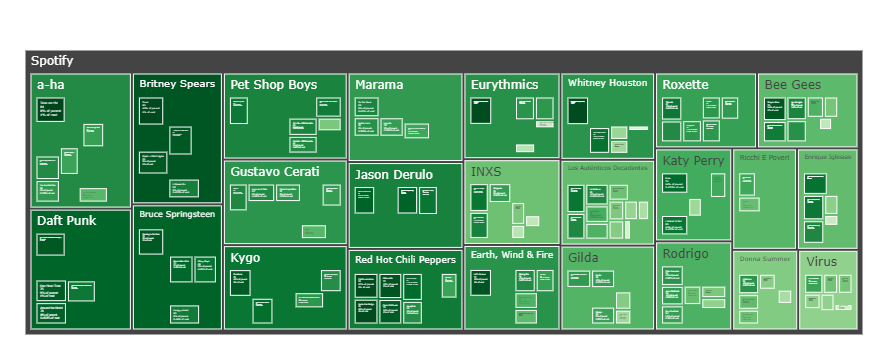

In [376]:
fig = go.Figure(go.Treemap(
    labels = labels,
    values = values,
    parents = parents,
    textinfo = "label+value+percent parent+percent root",
    marker_colorscale = 'Greens'
))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()

<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Interactive Parallel Coordinates</span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Features by Track</span><br>
Parallel plot or Parallel Coordinates plot allows to compare the feature of several individual observations on a set of numeric variables. Each vertical bar represents a variable and usually has its own scale. (The units can even be different). Values are then plotted as series of lines connected across each axis.

Parallel plot is the equivalent of a spider chart, but with cartesian coordinates. 

Its strength is that the variables can even be completely different: different ranges and even different units.

https://plotly.com/python/parallel-coordinates-plot/

In [391]:
# Import the library
import plotly.express as px

In [401]:
df_pc = df_hist[df_hist.popularity>60][['artist', 'track_name', 'popularity', 'danceability', 'energy', 'tempo']]
df_pc.shape

(455, 6)

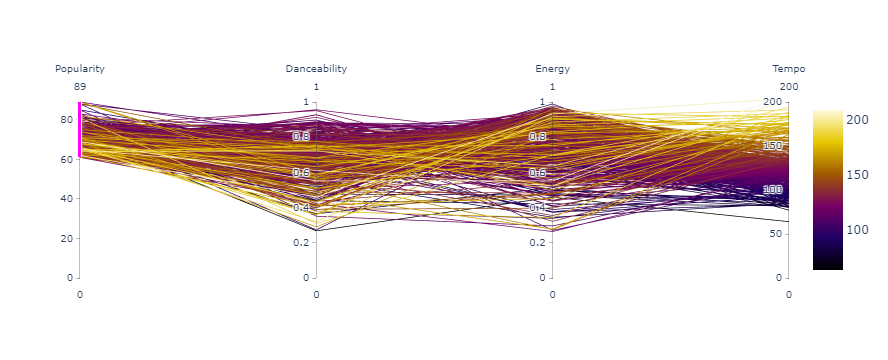

In [410]:
# Ploty colorscales https://plotly.com/python/colorscales/ color_continuous_scale=["red", "green", "blue"]
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df_pc.tempo,
                   colorscale = 'Electric'
                   , showscale = True),
        dimensions = list([
            dict(range = [0, df_pc.popularity.max()],
                constraintrange = [df_pc.popularity.min(), df_pc.popularity.max()],
                label = 'Popularity', values = df_pc['popularity']),
            dict(range = [0,1],
                label = 'Danceability', values = df_pc['danceability']),
            dict(range = [0,1],
                label = 'Energy', values = df_pc['energy']),
            dict(range = [0,200],
                label = 'Tempo', values = df_pc['tempo'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
VERRRR

#https://code.google.com/archive/p/google-chartwrapper/
 take this data, and make it
available on the web to view visually. 
# https://python-google-charts.readthedocs.io/en/latest/pygooglechart.html
# https://github.com/Dfenestrator/GooPyCharts

Librería para crear páginas web en python: https://j2logo.com/leccion-1-la-primera-aplicacion-flask/

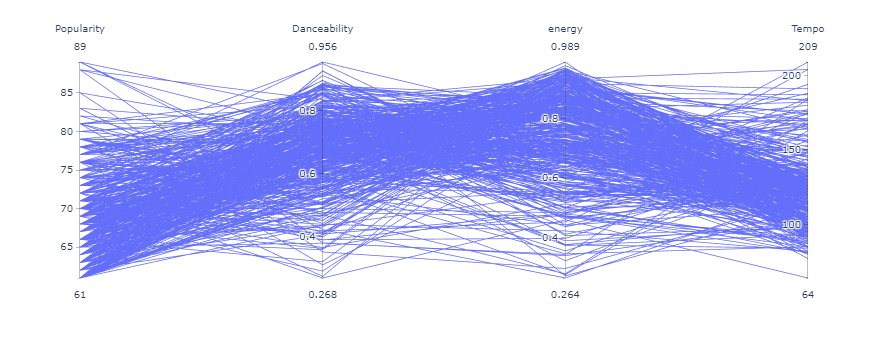

In [403]:
# Create the chart:
fig = px.parallel_coordinates(
    df_pc, 
    labels={'artist': 'Artist', 'popularity': "Popularity", "danceability": "Danceability", "acousticness": "Acousticness"
            , "tempo": "Tempo", },
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2)

# Hide the color scale that is useless in this case
fig.update_layout(coloraxis_showscale=False)

# Show the plot
fig.show()

# If you need to save this file as a standalone html file:
#fig.write_html("../../static/interactiveCharts/parallel-coordinate-plot-plotly.html")

In [ ]:

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

### List production x year

In [270]:
#df_hist['list_year'] = df_hist.playlist_date.dt.year

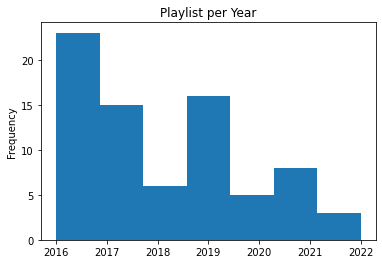

In [169]:
df_hist.drop_duplicates(subset=['playlist_id'], keep='last')['playlist_year'].\
    plot.hist(bins=7, title='Playlist per Year');

### Top Artists x Year of Playlist

In [329]:
df_aux = pd.DataFrame(data=df_pl.groupby(['playlist_year', 'artist']).track_name.count()).reset_index().\
    sort_values(by=['playlist_year', 'track_name'], ascending=False)
df_aux.groupby(['playlist_year']).head(2)

,playlist_year,artist,track_name
1709,2022,Madonna,9
1717,2022,Michael Jackson,6
1533,2021,Madonna,8
1456,2021,Camilo,7
1323,2020,Britney Spears,8
1326,2020,Charly García,7
1066,2019,Bee Gees,22
1051,2019,ABBA,18
976,2018,Madonna,11
903,2018,Daryl Hall & John Oates,8


In [332]:
pd.DataFrame(data=df_pl.groupby(['artist']).track_name.count()).reset_index().\
    sort_values(by=['track_name'], ascending=False).head(10)
#df_pl.groupby(['artist']).head(2)

,artist,track_name
906,Soda Stereo,57
629,Madonna,51
165,Charly García,49
83,Bee Gees,36
308,Erasure,29
801,Queen,28
3,ABBA,26
579,Los Auténticos Decadentes,23
226,Daryl Hall & John Oates,23
675,Michael Jackson,22


In [340]:
pd.DataFrame(data=df_pl.groupby(['track_name']).track_name.count()).rename(columns={'track_name': 'count'}).\
    reset_index().sort_values(by=['count'], ascending=False).head(10)

,track_name,count
642,Gloria,10
95,Always on My Mind,7
398,Demoliendo Hoteles,7
187,Billie Jean,7
1307,Out of Touch - Video Mix,7
729,Holiday,6
1514,Scream & Shout,6
546,Every Breath You Take,6
1460,Roar,6
1922,Want to Want Me,6


In [179]:
df_pl[df_pl.track_decade==2000].\
    drop_duplicates(subset=['artist', 'track_name']).\
    pivot_table(index='artist', values='track_name', aggfunc=['count']).\
    sort_values(by=('count', 'track_name'), ascending=False)[:50]

,count
,track_name
artist,
Madonna,12
Soda Stereo,7
Virus,6
Los Auténticos Decadentes,6
Gorillaz,5
Elvis Presley,5
The Beatles,5
Thalia,4


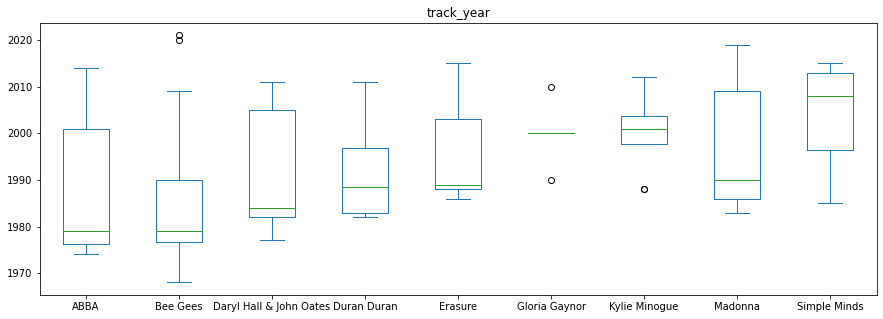

In [181]:
artists = ['Bee Gees', 'ABBA', 'Daryl Hall & John Oates', 'Duran Duran', 'Simple Minds', 'Gloria Gaynor', 'Erasure'
          , 'Kylie Minogue', 'Madonna']
df_pl[['artist', 'track_name', 'track_year']][df_pl.artist.isin(artists)].\
    plot.box(column='track_year', by='artist', figsize=(15, 5));

In [186]:
df_pl[['artist', 'track_name']][df_pl.artist.isin(artists)].\
    drop_duplicates(subset=['artist', 'track_name']).\
    pivot_table(index='artist', values='track_name', aggfunc=['count']).\
    plot.bar(x='artist', y=('count', 'track_name'), figsize=(15, 5));

KeyError: 'artist'

# PRUEBAS

In [126]:
from PIL import Image
# Word Cloud con una imágen de fondo

In [127]:
# read the mask image
mask = np.array(Image.open("spotify_logo.png"))

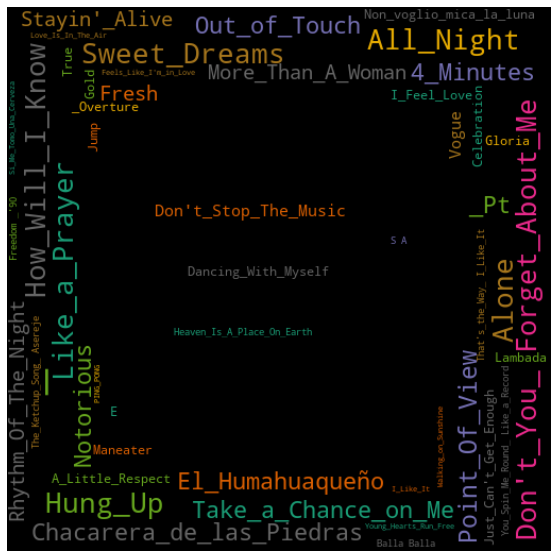

In [136]:
stop_words = ['_feat', 'feat', '_Radio_Edit', '_Original_Mix', '_Remasterizado_2007', '_Remix', '_Remastered'
              , '_Original', 'En_Vivo', '_2', 'Remix']
#text = ' '.join([word_[:25] for word_ in ['_'.join(word.split()) for word in df_aux.track_name.to_list()]])
text = ' '.join(['_'.join(word.split()) for word in df_aux.track_name.to_list()])
word_cloud = WordCloud(stopwords=stop_words, max_font_size=40, max_words=50, mask=mask
                       , prefer_horizontal=0.7, background_color="black", colormap="Dark2").generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [96]:
# playlist tracks is a list of dict. Important attributes: added_at, track
# track is a dict: 
# ['album']['name'], ["release_date"], ["total_tracks"], ['id'], ['uri']
# ['album']['artist'] is a list!! # ['album']['artist'][0]['name'], ['album']['artist'][0]['id'] and ['uri']
# ['artist'] is a list: ['name'], ['id'] and ['uri']
# ['duration'], ['name'], ['popularity'], ['track_number']
#playlist_tracks = sp.user_playlist_tracks(user=user, playlist_id=playlists[0]['id']
#                                        , fields=None, limit=100, offset=0, market=None)
results = sp.user_playlist_tracks(user=user, playlist_id=playlists[56]['id']
                                , fields=None, limit=100, offset=0, market=None)
playlist_tracks = results['items']
while results['next']:
    results = sp.next(results)
    playlist_tracks.extend(results['items'])

In [97]:
print('************ Tracks *************')
idx=0
for playlist_track in playlist_tracks:
    idx+=1
    #if idx < 60:
    track = playlist_track['track']
    print(idx, track['name'], 'Duration [m]:', round(int(track['duration_ms'])/1000/60, 2)
          , 'Popularity:', track['popularity']
        , 'Album:', track['album']['name'], 'Released:', track['album']["release_date"]
        , '1° Artist:', track['artists'][0]['name'], 'Added at:', playlist_track['added_at'])

************ Tracks *************
1 All Shook Up - from 'Honeymoon in Vegas' OST Duration [m]: 2.15 Popularity: 21 Album: My Lives Released: 2005-11-22 1° Artist: Otis Blackwell Added at: 2016-12-20T20:44:22Z
2 Summer Of '69 Duration [m]: 3.55 Popularity: 0 Album: The Best Of Me Released: 1999-01-01 1° Artist: Bryan Adams Added at: 2016-12-20T20:44:29Z
3 That Thing You Do! Duration [m]: 2.78 Popularity: 52 Album: That Thing You Do! Original Motion Picture Soundtrack Released: 1996-09-24 1° Artist: The Wonders Added at: 2016-12-20T20:44:39Z
4 The Rockafeller Skank Duration [m]: 6.9 Popularity: 0 Album: You've Come a Long Way Baby Released: 1998-01-01 1° Artist: Fatboy Slim Added at: 2016-12-20T20:44:45Z
5 Here I Go Again 87 - 2007 Remastered Version Duration [m]: 4.5 Popularity: 0 Album: 1987 Released: 1987-04-04 1° Artist: Whitesnake Added at: 2016-12-20T20:45:07Z
6 Baby Doll Duration [m]: 3.02 Popularity: 5 Album: L'Essential Released: 2011-05-02 1° Artist: Plastic Bertrand Added at: 

In [ ]:
# Para acceder a más de 50 playlists (o tracks) hay que hacer la consulta en forma paginada:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [ ]:
for idx, playlist in enumerate(playlists['items']):
    if idx < 60:
        #print(json.dumps(playlist, sort_keys=True, indent=4))
        #print(idx + 1, playlist['name'], playlist['uri'], playlist['id'], playlist['tracks']['total'])
        playlist = sp.playlist(playlists['items'][idx]['id'], fields=None, market=None, additional_types=('track', ))
        print(idx, playlist['name'], 'Followers:', playlist['followers']['total'], 'Id:', playlist['id']
              , 'Creada:', playlist['tracks']['items'][0]['added_at']
              , 'Cantidad de Tracks', playlist['tracks']['total']
             )


In [ ]:
tracks_id = []
tracks = []
for idx, item in enumerate(results['items']):
    if idx < 10:
        #print(json.dumps(item, sort_keys=True, indent=4))
        tracks_id.append(item['id'])
        tracks.append([item['id'], item['name'], item['artists'][0]['name'], item['popularity']
                      , round(int(item['duration_ms'])/1000/60, 2)
                      , item['album']['name'], item['album']['release_date']])
        #print(idx+1, item['name'], 'Track popularity:', item['popularity']
        #     , 'Duration [min]:', round(int(item['duration_ms'])/1000/60, 2)
        #     , item['id'])
        #print('Artist:', item['artists'][0]['name'])
        #print('Artist uri:', item['artists'][0]['uri'])
        #print('Album:', item['album']['name'], 'Release date:', item['album']['release_date'])
features = sp.audio_features(tracks_id)

#df_feat = pd.DataFrame(data=features, columns=features[0].keys())
df_feat = pd.DataFrame(columns=['id', 'title', 'artists', 'popularity', 'duration', 'album', 'release_date'
                                , 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness'
                                , 'liveness', 'valence', 'tempo', 'time_signature'])
for idx, feature in enumerate(features):
    #print(idx, tracks[idx], feature['danceability'])
    for f in ['danceability', 'energy', 'key', 'loudness','mode', 'acousticness', 'instrumentalness', 'liveness'
              , 'valence', 'tempo', 'time_signature']:
        tracks[idx].append(feature[f])
    df_feat.loc[len(df_feat)] = tracks[idx]

In [117]:
# current_user_saved_tracks_contains(tracks=None)
results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

Enter the URL you were redirected to:  https://www.google.com/?code=AQAe6omtHX1vdzIYho9MGMQPXvtuwVsI0HytagBWF2pSE8oFjXK2WDDDr9FeDwSWMPeCLZs-OHMWssAKVNx2LLS4JHebAVFouxj4exccD2o8qe356Le3knXN6koiKtNfpyU1QVjCxQ5ZYv_-nyb6htUEMf2Hzi3-yJbc3TRpeOBVOpyg061mYHpdv0uxB4xB_4rZp8JYLHuiT3JOMKczxAZ8BnzzkIQ4UlBDJiFealRsKI4


0 Information Society  –  What's on Your Mind (Pure Energy)
1 Apollo 440  –  Charlie's Angels 2000 - Apollo 440 w/o Dialog
2 The Weeknd  –  Blinding Lights
3 Lira  –  Vámonos
4 The Weeknd  –  Take My Breath - Single Version
5 Camilo  –  KESI - Remix
6 Gareth Emery  –  Take Everything
7 SilkandStones  –  Wicked Game
8 Dua Lipa  –  Love Again
9 Dua Lipa  –  Love Again (Horse Meat Disco Remix)
10 The Weeknd  –  Blinding Lights
11 Robert Miles  –  One & One (feat. Maria Nayler)
12 Duran Duran  –  Is There Something I Should Know?
13 Diego Torres  –  Color Esperanza
14 Blue Hawaii  –  No One Like You
15 AShamaluevMusic  –  Epic Presentation
16 Las Pelotas  –  Hola Que Tal
17 Turf  –  No Se Llama Amor
18 Babasónicos  –  Los Calientes
19 Tan Bionica  –  Ciudad Mágica


In [118]:
results = sp.current_user_recently_played(limit=20, after=None, before=None)
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 The Hollywood Studio Symphony  –  The Pink Panther Theme - Remastered
1 Maroon 5  –  Sugar
2 Andy Gibb  –  Shadow Dancing
3 Shania Twain  –  Man! I Feel Like A Woman!
4 Katy Perry  –  Roar
5 Kylie Minogue  –  The Loco-Motion
6 Meghan Trainor  –  All About That Bass
7 Gloria Gaynor  –  I Am What I Am
8 Black Eyed Peas  –  I Gotta Feeling - Edit
9 Candi Staton  –  Young Hearts Run Free
10 Olivia Newton-John  –  Physical - Remastered 2021
11 Elton John  –  Don't Go Breaking My Heart
12 MC Hammer  –  U Can't Touch This
13 Bruno Mars  –  Marry You
14 Justin Timberlake  –  CAN'T STOP THE FEELING! (from DreamWorks Animation's "TROLLS")
15 Kylie Minogue  –  The Loco-Motion
16 Jason Derulo  –  Want to Want Me
17 Taylor Swift  –  Shake It Off
18 KC & The Sunshine Band  –  That's the Way (I Like It) - 2004 Remaster
19 Andy Gibb  –  Shadow Dancing


In [129]:
results = sp.current_user_top_artists(limit=20, offset=0, time_range='long_term')
#print(json.dumps(results, sort_keys=True, indent=4))
for idx, item in enumerate(results['items']):
    if idx < 10:
        #print(item)
        print(idx+1, item['name'], " Followers ", item['followers']['total'], 'Popularity', item['popularity'])
        print('Artist uri:', item['uri'])

1 Soda Stereo  Followers  6607510 Popularity 77
Artist uri: spotify:artist:7An4yvF7hDYDolN4m5zKBp
2 Erasure  Followers  842107 Popularity 65
Artist uri: spotify:artist:0z5DFXmhT4ZNzWElsM7V89
3 Bee Gees  Followers  5628483 Popularity 80
Artist uri: spotify:artist:1LZEQNv7sE11VDY3SdxQeN
4 ABBA  Followers  7902709 Popularity 83
Artist uri: spotify:artist:0LcJLqbBmaGUft1e9Mm8HV
5 Charly García  Followers  1225373 Popularity 68
Artist uri: spotify:artist:3jO7X5KupvwmWTHGtHgcgo
6 Madonna  Followers  6063169 Popularity 82
Artist uri: spotify:artist:6tbjWDEIzxoDsBA1FuhfPW
7 Gustavo Cerati  Followers  3060891 Popularity 73
Artist uri: spotify:artist:1QOmebWGB6FdFtW7Bo3F0W
8 Queen  Followers  41154452 Popularity 88
Artist uri: spotify:artist:1dfeR4HaWDbWqFHLkxsg1d
9 George Michael  Followers  3747893 Popularity 76
Artist uri: spotify:artist:19ra5tSw0tWufvUp8GotLo
10 Katy Perry  Followers  21298631 Popularity 88
Artist uri: spotify:artist:6jJ0s89eD6GaHleKKya26X


In [199]:
################# TOP TRACKS #############################
#current_user_top_tracks(limit=20, offset=0, time_range='medium_term')
results = sp.current_user_top_tracks(limit=20, offset=0, time_range='medium_term')
tracks_id = []
tracks = []
for idx, item in enumerate(results['items']):
    if idx < 10:
        #print(json.dumps(item, sort_keys=True, indent=4))
        tracks_id.append(item['id'])
        tracks.append([item['id'], item['name'], item['artists'][0]['name'], item['popularity']
                      , round(int(item['duration_ms'])/1000/60, 2)
                      , item['album']['name'], item['album']['release_date']])
        #print(idx+1, item['name'], 'Track popularity:', item['popularity']
        #     , 'Duration [min]:', round(int(item['duration_ms'])/1000/60, 2)
        #     , item['id'])
        #print('Artist:', item['artists'][0]['name'])
        #print('Artist uri:', item['artists'][0]['uri'])
        #print('Album:', item['album']['name'], 'Release date:', item['album']['release_date'])
features = sp.audio_features(tracks_id)

#df_feat = pd.DataFrame(data=features, columns=features[0].keys())
df_feat = pd.DataFrame(columns=['id', 'title', 'artists', 'popularity', 'duration', 'album', 'release_date'
                                , 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness'
                                , 'liveness', 'valence', 'tempo', 'time_signature'])
for idx, feature in enumerate(features):
    #print(idx, tracks[idx], feature['danceability'])
    for f in ['danceability', 'energy', 'key', 'loudness','mode', 'acousticness', 'instrumentalness', 'liveness'
              , 'valence', 'tempo', 'time_signature']:
        tracks[idx].append(feature[f])
    df_feat.loc[len(df_feat)] = tracks[idx]

In [202]:
# acousticness: from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
# danceability: how suitable a track is for dancing based on a combination of musical elements including tempo, 
# rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
# energy: from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
# Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, 
# while a Bach prelude scores low on the scale. 
# instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental 
# Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
# key: E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
# liveness: Detects the presence of an audience in the recording. Above 0.8 provides strong likelihood the track is live.
# loudness: The overall loudness of a track in decibels (dB).
# mode: modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
# Major is represented by 1 and minor is 0.
# speechiness: Speechiness detects the presence of spoken words in a track. 
# Values between 0.33 and 0.66 describe tracks that may contain both music and speech
# time_signature: notational convention to specify how many beats are in each bar (or measure). 
# The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
df_feat
#tracks[0].append(0.2)
#tracks[0].append(features[0]['danceability'])
#tracks[0]

,id,title,artists,popularity,duration,album,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,4UfupbARPxljVkBmuZlJnY,Starlight - Radio Edit,The Supermen Lovers,60,3.9,Starlight,2001-01-01,0.7,0.7,0,-5.1,1,0.0,0.0,0.4,0.8,127.5,4
1,1Jlt67b4oOhCoFW9GQwL9T,Point of View - Radio Edit,DB Boulevard,53,3.9,Point of View,2018-01-01,0.7,0.7,6,-6.9,1,0.0,0.1,0.1,0.3,129.0,4
2,0stFnba2tLcTLRWGEebkwG,In the Music - Radio Edit - Short,Deepswing,37,2.8,"TIME2DANCE: Best of '90s - '00s, Vol. 2",2018-10-26,0.8,1.0,6,-2.1,0,0.0,0.6,0.1,0.6,127.0,4
3,2bgTY4UwhfBYhGT4HUYStN,Butter,BTS,38,2.7,"Butter (Hotter, Sweeter, Cooler)",2021-06-04,0.8,0.5,8,-5.2,1,0.0,0.0,0.1,0.7,110.0,4
4,2mkBHN67xLpHrpqOuj79Yz,Chase the Sun,Planet Funk,54,3.9,Non Zero Sumness Plus One,2003-01-01,0.6,0.8,9,-7.5,0,0.0,0.0,0.4,0.5,128.0,4
5,3CyM904rc7aBoW1fjSoFqP,Let's Go Dancing (Are You Ready?),Anti-Funky,26,4.0,Happy Birthday Compilation,2008-12-08,0.8,1.0,11,-4.8,0,0.0,0.1,0.3,0.4,136.3,4
6,3E7ZwUMJFqpsDOJzEkBrQ7,Can't Get You out of My Head,Kylie Minogue,72,3.8,Fever,2001-10-01,0.8,0.6,9,-7.5,0,0.0,0.7,0.1,1.0,126.0,4
7,5iIpbD34k4wnuRMZDNnuWf,I'm Not Cool,HyunA,67,2.9,I'm Not Cool,2021-01-28,0.9,0.8,11,-2.1,1,0.0,0.0,0.3,0.7,116.0,4
8,5xIgUVyDHfDFC87Zsi8Dip,Keep Control - Original Edit,Sono,25,3.7,Keep Control Plus,2009-04-03,0.8,0.9,0,-9.5,1,0.0,0.8,0.1,0.6,130.0,4
9,6bNtUSX1wtDcebjCMeM76P,Chiki Chika,Not Real Presence,41,4.4,Años 90's Vol.5 - Lo Mejor De Los 90,2009-04-23,0.9,0.8,0,-8.5,1,0.0,0.9,0.1,0.8,125.4,4


In [232]:
playlists['next']
results = sp.next(playlists)
results

{'href': 'https://api.spotify.com/v1/users/colmo-ar/playlists?offset=50&limit=50',
 'items': [{'collaborative': False,
   'description': '',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/7tKiLAyAYHjMWq2ezww4zs'},
   'href': 'https://api.spotify.com/v1/playlists/7tKiLAyAYHjMWq2ezww4zs',
   'id': '7tKiLAyAYHjMWq2ezww4zs',
   'images': [{'height': 640,
     'url': 'https://mosaic.scdn.co/640/ab67616d0000b273131f210f8433b9047feb67ecab67616d0000b2733686b13292710df04021acaaab67616d0000b273502c913f7496cd482eebcdd4ab67616d0000b273b4c5f2cf772acba4844256c6',
     'width': 640},
    {'height': 300,
     'url': 'https://mosaic.scdn.co/300/ab67616d0000b273131f210f8433b9047feb67ecab67616d0000b2733686b13292710df04021acaaab67616d0000b273502c913f7496cd482eebcdd4ab67616d0000b273b4c5f2cf772acba4844256c6',
     'width': 300},
    {'height': 60,
     'url': 'https://mosaic.scdn.co/60/ab67616d0000b273131f210f8433b9047feb67ecab67616d0000b2733686b13292710df04021acaaab67616d0000b273502c913

In [222]:
print(json.dumps(playlist, sort_keys=True, indent=4))

{
    "collaborative": false,
    "description": "",
    "external_urls": {
        "spotify": "https://open.spotify.com/playlist/4tMZamkzAlFJOcvyQ2egml"
    },
    "followers": {
        "href": null,
        "total": 0
    },
    "href": "https://api.spotify.com/v1/playlists/4tMZamkzAlFJOcvyQ2egml?additional_types=track",
    "id": "4tMZamkzAlFJOcvyQ2egml",
    "images": [
        {
            "height": 640,
            "url": "https://mosaic.scdn.co/640/ab67616d0000b2734650ca0a8f88129d4667acc5ab67616d0000b273abc5193decc1a2984a93f31eab67616d0000b273b30c8b93cef6fa26f8a7f17aab67616d0000b273d0a50cacfb47854fa416cd6c",
            "width": 640
        },
        {
            "height": 300,
            "url": "https://mosaic.scdn.co/300/ab67616d0000b2734650ca0a8f88129d4667acc5ab67616d0000b273abc5193decc1a2984a93f31eab67616d0000b273b30c8b93cef6fa26f8a7f17aab67616d0000b273d0a50cacfb47854fa416cd6c",
            "width": 300
        },
        {
            "height": 60,
            "url": "

In [8]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="561eaaa8d6e7425e82ce1058c901d256",
                                                           client_secret="b283b99b470f43429409389670355747"))

In [10]:
# Obtenemos información de la playlist de Spotify
# https://open.spotify.com/playlist/3iyOp2p6HOArmeXaJXa4jK?si=542eeb346244492d
playlist = sp.user_playlist("colmo-ar", "3iyOp2p6HOArmeXaJXa4jK?si=542eeb346244492d", fields="tracks,next")
tracks = playlist["tracks"] 
songs = tracks["items"]

In [14]:
playlist_features_list = ["artist", "album", "track_name", "track_id", "danceability", "energy", "key", "loudness", "mode"
                          , "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
                          ,"time_signature"]
playlist_df = pd.DataFrame(columns = playlist_features_list)

In [48]:
playlist = sp.user_playlist_tracks("colmo-ar", "3iyOp2p6HOArmeXaJXa4jK?si=542eeb346244492d")["tracks"]["items"]

In [49]:
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    #print(playlist_features)
    playlist_df.loc[len(playlist_df)] = playlist_features

In [25]:
playlist_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cher,Believe,Believe,2goLsvvODILDzeeiT4dAoR,0.652,0.917,6,-6.72,1,0.0548,0,0.0509,0.459,132.975,239027,4
1,The Supermen Lovers,Starlight,Starlight - Radio Edit,4UfupbARPxljVkBmuZlJnY,0.739,0.679,0,-5.079,1,0.0373,0.0187,0.389,0.786,127.487,234400,4
2,Sono,Keep Control Plus,Keep Control - Original Edit,5xIgUVyDHfDFC87Zsi8Dip,0.794,0.915,0,-9.535,1,0.0767,0.806,0.085,0.583,129.988,223907,4
3,Planet Funk,Non Zero Sumness Plus One,Chase the Sun,2mkBHN67xLpHrpqOuj79Yz,0.591,0.765,9,-7.511,0,0.0305,0.028,0.357,0.485,128.014,233040,4
4,Various Artists,"TIME2DANCE: Best of '90s - '00s, Vol. 2",In the Music - Radio Edit - Short,0stFnba2tLcTLRWGEebkwG,0.798,0.957,6,-2.086,0,0.0414,0.629,0.0713,0.647,126.998,165448,4
5,DB Boulevard,Point Of View,Point Of View - Radio Edit,1bNl9932PbUOu7Zw1xe2fR,0.676,0.715,6,-6.854,1,0.0287,0.0746,0.0685,0.275,129.006,231167,4
6,Various Artists,Happy Birthday Compilation,Let's Go Dancing (Are You Ready?),3CyM904rc7aBoW1fjSoFqP,0.764,0.978,11,-4.831,0,0.0796,0.0734,0.349,0.445,136.306,238097,4
7,Various Artists,Años 90's Vol.5 - Lo Mejor De Los 90,Chiki Chika,6bNtUSX1wtDcebjCMeM76P,0.875,0.81,0,-8.471,1,0.0556,0.93,0.107,0.817,125.434,266240,4
8,Kylie Minogue,Fever,Can't Get You out of My Head,3E7ZwUMJFqpsDOJzEkBrQ7,0.766,0.563,9,-7.516,0,0.0339,0.683,0.115,0.964,126.007,230640,4
9,Cher,Believe,Believe,2goLsvvODILDzeeiT4dAoR,0.652,0.917,6,-6.72,1,0.0548,0,0.0509,0.459,132.975,239027,4


In [29]:
# https://open.spotify.com/artist/72OaDtakiy6yFqkt4TsiFt?si=On8D2XxOQvmKwCvOpwTQww
artist_id = '72OaDtakiy6yFqkt4TsiFt?si=On8D2XxOQvmKwCvOpwTQww'
cher_top_tracks = sp.artist_top_tracks(artist_id, country='US')
cher_top_tracks['uri']

'spotify:artist:72OaDtakiy6yFqkt4TsiFt'

In [41]:
cher_albums = sp.artist_albums(cher_top_tracks['uri'], album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(cher_albums['items'])):
    album_names.append(cher_albums['items'][i]['name'])
    album_uris.append(cher_albums['items'][i]['uri'])
    
album_names
#album_uris

['Dancing Queen',
 'Closer to the Truth',
 'Closer to the Truth',
 'Closer to the Truth (Deluxe Edition)',
 'Living Proof',
 'Living Proof',
 'Believe',
 "It's a Man's World",
 "It's a Man's World",
 'Love Hurts',
 'Heart Of Stone',
 'Cher',
 'I Paralyze (Expanded Edition)',
 'Prisoner',
 'Take Me Home',
 'Dark Lady',
 'Half Breed',
 'Half-Breed',
 'Foxy Lady',
 'Gypsys, Tramps & Thieves']

In [51]:
from spotipy import util

In [73]:
uri = "http://localhost/callback"

In [74]:
# https://gist.github.com/sokjc/35626b6a3e0be28742c280672148ba6c
user = 'colmo-ar'
CLIENT_ID = "561eaaa8d6e7425e82ce1058c901d256"
CLIENT_SECRET = "b283b99b470f43429409389670355747"
scope = 'user-top-read'
token = util.prompt_for_user_token(username = user,
                                   scope = scope,
                                   client_id= CLIENT_ID,
                                   client_secret=CLIENT_SECRET,
                                   redirect_uri= uri)

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to:  http://localhost/callback?code=AQAzo93zXVE_xW0EUCi8Iy6ibDd7I9dakPxNUPp7yjwOBUqfn-AFkIvIzs4BpSolXUV0zwiRwNY0sPdXXXYBiQsznC1ZviGM7uCrwjw4ZbildzriRL5BUrAhPfs1dbO58fb8mmGJfZPeQyn5qODDg6uU5N1srJ4UplYihaLQW1Nlxg0V5SVnUyc1eOM


In [76]:
token

'BQBc6m8mHyIS8sBEgqOnFdXALABx8UluyXixHoxiWCLoXkdIiy_GCgRHuCGVY8xKZyfKuymaF3S8aRhYGz1YecX4F4TfdLDTtW6gKo1MI8mNGwjlWzzSBeM3BceuAEbBGAvdkja9m-NHPlQ9FgExKRY'

In [79]:
scope = 'user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope)

ranges = ['short_term', 'medium_term', 'long_term']

for sp_range in ranges:
    print("range:", sp_range)
    results = sp.current_user_top_tracks(time_range=sp_range, limit=50)
    for i, item in enumerate(results['items']):
        print(i, item['name'], '//', item['artists'][0]['name'])
    print()

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [5]:
from spotipy.oauth2 import SpotifyOAuth

In [6]:
scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [ ]:

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

In [ ]:
// from your [app settings](https://developer.spotify.com/dashboard/applications)
    export SPOTIPY_CLIENT_ID=client_id_here
    export SPOTIPY_CLIENT_SECRET=client_secret_here
    export SPOTIPY_REDIRECT_URI='http://127.0.0.1:8080' // must contain a port
    // SPOTIPY_REDIRECT_URI must be added to your [app settings](https://developer.spotify.com/dashboard/applications)
    OPTIONAL
    // in development environment for debug output
    export FLASK_ENV=development
    // so that you can invoke the app outside of the file's directory include
    export FLASK_APP=/path/to/spotipy/examples/app.py
 
    // on Windows, use `SET` instead of `export`
Run app.py
    python3 app.py OR python3 -m flask run
    NOTE: If receiving "port already in use" error, try other ports: 5000, 8090, 8888, etc...
        (will need to be updated in your Spotify app and SPOTIPY_REDIRECT_URI variable)
"""


In [80]:
import os
from flask import Flask, session, request, redirect
from flask_session import Session
import uuid

ModuleNotFoundError: No module named 'flask_session'

In [ ]:
user = 'colmo-ar'
scope = 'user-top-read'
SPOTIPY_CLIENT_ID = "561eaaa8d6e7425e82ce1058c901d256"
SPOTIPY_CLIENT_SECRET = "b283b99b470f43429409389670355747"
SPOTIPY_REDIRECT_URI='http://localhost/'

In [ ]:

app = Flask(__name__)
app.config['SECRET_KEY'] = os.urandom(64)
app.config['SESSION_TYPE'] = 'filesystem'
app.config['SESSION_FILE_DIR'] = './.flask_session/'
Session(app)

caches_folder = './.spotify_caches/'
if not os.path.exists(caches_folder):
    os.makedirs(caches_folder)

def session_cache_path():
    return caches_folder + session.get('uuid')

@app.route('/')
def index():
    if not session.get('uuid'):
        # Step 1. Visitor is unknown, give random ID
        session['uuid'] = str(uuid.uuid4())

    cache_handler = spotipy.cache_handler.CacheFileHandler(cache_path=session_cache_path())
    auth_manager = spotipy.oauth2.SpotifyOAuth(scope='user-read-currently-playing playlist-modify-private',
                                                cache_handler=cache_handler, 
                                                show_dialog=True)

    if request.args.get("code"):
        # Step 3. Being redirected from Spotify auth page
        auth_manager.get_access_token(request.args.get("code"))
        return redirect('/')

    if not auth_manager.validate_token(cache_handler.get_cached_token()):
        # Step 2. Display sign in link when no token
        auth_url = auth_manager.get_authorize_url()
        return f'<h2><a href="{auth_url}">Sign in</a></h2>'

    # Step 4. Signed in, display data
    spotify = spotipy.Spotify(auth_manager=auth_manager)
    return f'<h2>Hi {spotify.me()["display_name"]}, ' \
           f'<small><a href="/sign_out">[sign out]<a/></small></h2>' \
           f'<a href="/playlists">my playlists</a> | ' \
           f'<a href="/currently_playing">currently playing</a> | ' \
           f'<a href="/current_user">me</a>' \


@app.route('/sign_out')
def sign_out():
    try:
        # Remove the CACHE file (.cache-test) so that a new user can authorize.
        os.remove(session_cache_path())
        session.clear()
    except OSError as e:
        print ("Error: %s - %s." % (e.filename, e.strerror))
    return redirect('/')


@app.route('/playlists')
def playlists():
    cache_handler = spotipy.cache_handler.CacheFileHandler(cache_path=session_cache_path())
    auth_manager = spotipy.oauth2.SpotifyOAuth(cache_handler=cache_handler)
    if not auth_manager.validate_token(cache_handler.get_cached_token()):
        return redirect('/')

    spotify = spotipy.Spotify(auth_manager=auth_manager)
    return spotify.current_user_playlists()


@app.route('/currently_playing')
def currently_playing():
    cache_handler = spotipy.cache_handler.CacheFileHandler(cache_path=session_cache_path())
    auth_manager = spotipy.oauth2.SpotifyOAuth(cache_handler=cache_handler)
    if not auth_manager.validate_token(cache_handler.get_cached_token()):
        return redirect('/')
    spotify = spotipy.Spotify(auth_manager=auth_manager)
    track = spotify.current_user_playing_track()
    if not track is None:
        return track
    return "No track currently playing."


@app.route('/current_user')
def current_user():
    cache_handler = spotipy.cache_handler.CacheFileHandler(cache_path=session_cache_path())
    auth_manager = spotipy.oauth2.SpotifyOAuth(cache_handler=cache_handler)
    if not auth_manager.validate_token(cache_handler.get_cached_token()):
        return redirect('/')
    spotify = spotipy.Spotify(auth_manager=auth_manager)
    return spotify.current_user()


'''
Following lines allow application to be run more conveniently with
`python app.py` (Make sure you're using python3)
(Also includes directive to leverage pythons threading capacity.)
'''
if __name__ == '__main__':
    app.run(threaded=True, port=int(os.environ.get("PORT",
                                                   os.environ.get("SPOTIPY_REDIRECT_URI", 8080).split(":")[-1])))